## Group 10
## Domain- Social Media Analysis

## Importing the libraries needed

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# 1.Data collection

The dataset used here for siocial media analysis is about the social media usage of 1628 individuals , here the usage time of facebook ,whatsapp and instagram is given.Target is selected as the total social media usage. 

Here along with usage times , a persons age,city,gender,current status and phone OS is also given

## Reading the dataset to the python environment

In [78]:
data= pd.read_csv('socialmedia.csv')

In [79]:
data.head()
##checking whether the dataset is loaded properly

,Age,City,Current Status,Do you own multiple profiles on Instagram?,Gender,Highest Education,Location (City Airport Code),Phone OS,State,Zone,...,Time Spent on Instagram in last week (in minutes),Time Spent on Instagram in last weekend (in minutes),Time Spent on WhatsApp in last week (in minutes),Time Spent on WhatsApp in last weekend (in minutes),Total Facebook Usage,Total Instagram Usage,Total Social Media Usage,Total Week Usage,Total Weekend Usage,Total WhatsApp Usage
0,24,Delhi,Working professional,No,Female,Graduation,DEL,iOs,Delhi,Northern,...,770,400,900,120,0,"1,170","2,190","1,670",520,"1,020"
1,39,Delhi,Working professional,No,Female,Post graduation,DEL,iOs,Delhi,Northern,...,0,0,"5,000","2,000","8,160",0,"15,160","11,000","4,160","7,000"
2,22,Mumbai,Working professional,No,Male,Graduation,BOM,Android,Maharashtra,Western,...,"1,000","1,000","7,000","2,000","2,500","2,000","13,500","8,500","5,000","9,000"
3,26,Bengaluru,Sabbatical,Yes,Female,Graduation,BLR,Android,Karnataka,Southern,...,"2,000","2,000","1,680","1,680","3,000","4,000","10,360","5,180","5,180","3,360"
4,50,Delhi,Working professional,No,Male,Graduation,DEL,iOs,Delhi,Northern,...,0,0,"2,400","1,300","3,000",0,"6,700","3,900","2,800","3,700"


In [80]:
data.shape
##checking the shape of the dataset

(1628, 26)

The given dataset consist of 1628 rows and 26 columns

In [81]:
data.info()
##to get the basic information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 26 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Age                                                                                                                   1628 non-null   int64  
 1   City                                                                                                                  1628 non-null   object 
 2   Current Status                                                                                                        1628 non-null   object 
 3   Do you own multiple profiles on Instagram?                                                                            1628 non-null   object 
 4   Gender

In [82]:
data.describe()
##Checking the statistics of columns

,Age,Latitude,Longitude
count,1628.000000,1628.000000,1628.000000
mean,26.858108,22.759734,77.894131
std,8.851719,5.072753,5.261110
min,13.000000,8.485498,69.669281
25%,22.000000,18.987807,72.836447
50%,24.000000,22.562627,77.231495
75%,27.000000,28.651952,78.456355
max,74.000000,32.735686,94.912000


In [83]:
data.isna().sum()
##Checking for any null values present in the dataset 

Age                                                                                                                     0
City                                                                                                                    0
Current Status                                                                                                          0
Do you own multiple profiles on Instagram?                                                                              0
Gender                                                                                                                  0
Highest Education                                                                                                       0
Location (City Airport Code)                                                                                            0
Phone OS                                                                                                                0
State                   

No null values are present in the dataset

# 2.Pre-processing

**As there is no null values present in the dataset, missing values handling is not performed**

# Feature Reduction

In [84]:
data.shape

(1628, 26)

In [85]:
data.columns

Index(['Age', 'City', 'Current Status',
       'Do you own multiple profiles on Instagram?', 'Gender',
       'Highest Education', 'Location (City Airport Code)', 'Phone OS',
       'State', 'Zone',
       'How many followers do you have on Instagram? (In case of multiple accounts, please mention the one with the maximum)',
       'How many posts do you have on Instagram?', 'Latitude', 'Longitude',
       'Time Spent on Facebook in last week (in minutes)',
       'Time Spent on Facebook in last weekend (in minutes)',
       'Time Spent on Instagram in last week (in minutes)',
       'Time Spent on Instagram in last weekend (in minutes)',
       'Time Spent on WhatsApp in last week (in minutes)',
       'Time Spent on WhatsApp in last weekend (in minutes)',
       'Total Facebook Usage', 'Total Instagram Usage',
       'Total Social Media Usage', 'Total Week Usage', 'Total Weekend Usage',
       'Total WhatsApp Usage'],
      dtype='object')

In [86]:
##removing unwanted column
data.drop(['Latitude','Longitude','Time Spent on Facebook in last week (in minutes)',
       'Time Spent on Facebook in last weekend (in minutes)',
       'Time Spent on Instagram in last week (in minutes)',
       'Time Spent on Instagram in last weekend (in minutes)',
       'Time Spent on WhatsApp in last week (in minutes)',
       'Time Spent on WhatsApp in last weekend (in minutes)',
       'How many followers do you have on Instagram? (In case of multiple accounts, please mention the one with the maximum)',
       'How many posts do you have on Instagram?',
       'Do you own multiple profiles on Instagram?'],axis=1,inplace=True)

In [87]:
data.shape

(1628, 15)

**changing the datatype of columns from object to float**

In [88]:
##changing the datatype
data['Total Week Usage'] = pd.to_numeric(data['Total Week Usage'],errors='coerce')
data['Total Weekend Usage'] = pd.to_numeric(data['Total Weekend Usage'],errors='coerce')
data['Total Social Media Usage']=pd.to_numeric(data['Total Social Media Usage'],errors='coerce')

In [89]:
##for handling NaN , infinity values
data['Total Week Usage'] = np.nan_to_num(data['Total Week Usage'])
data['Total Weekend Usage']=np.nan_to_num(data['Total Weekend Usage'])
data['Total Social Media Usage']=np.nan_to_num(data['Total Social Media Usage'])

## Encoding

In [90]:
data.describe(include=['object'])

,City,Current Status,Gender,Highest Education,Location (City Airport Code),Phone OS,State,Zone,Total Facebook Usage,Total Instagram Usage,Total WhatsApp Usage
count,1628,1628,1628,1628,1628,1628,1628,1628,1628,1628,1628
unique,53,4,3,3,60,3,26,6,474,766,866
top,Delhi,Working professional,Female,Graduation,DEL,Android,Delhi,Western,0,0,420
freq,372,796,813,950,372,1115,372,543,367,186,20


In [91]:
##label encoding
from sklearn import preprocessing
encoder=preprocessing.LabelEncoder()
data['Gender']=encoder.fit_transform(data['Gender'])

In [92]:
data.head()

,Age,City,Current Status,Gender,Highest Education,Location (City Airport Code),Phone OS,State,Zone,Total Facebook Usage,Total Instagram Usage,Total Social Media Usage,Total Week Usage,Total Weekend Usage,Total WhatsApp Usage
0,24,Delhi,Working professional,0,Graduation,DEL,iOs,Delhi,Northern,0,"1,170",0.0,0.0,520.0,"1,020"
1,39,Delhi,Working professional,0,Post graduation,DEL,iOs,Delhi,Northern,"8,160",0,0.0,0.0,0.0,"7,000"
2,22,Mumbai,Working professional,1,Graduation,BOM,Android,Maharashtra,Western,"2,500","2,000",0.0,0.0,0.0,"9,000"
3,26,Bengaluru,Sabbatical,0,Graduation,BLR,Android,Karnataka,Southern,"3,000","4,000",0.0,0.0,0.0,"3,360"
4,50,Delhi,Working professional,1,Graduation,DEL,iOs,Delhi,Northern,"3,000",0,0.0,0.0,0.0,"3,700"


# Outlier detection and handling

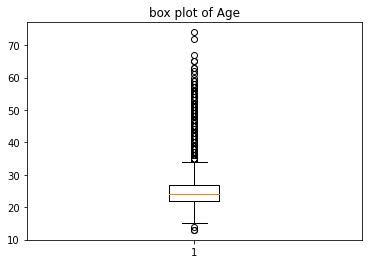

In [93]:
plt.boxplot(data['Age'])
plt.title('box plot of Age')
plt.show() 

In [94]:
Q1=np.percentile(data['Age'],25, interpolation='midpoint')
Q2=np.percentile(data['Age'],50, interpolation='midpoint')
Q3=np.percentile(data['Age'],75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

22.0
24.0
27.0


In [95]:
IQR=Q3-Q1

In [96]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

14.5
34.5


In [97]:
outlier=[]
for i in data['Age']:
    if(i>up_lim) or (i<low_lim):
        outlier.append(i)
print(outlier)  

[39, 50, 52, 45, 45, 35, 50, 45, 38, 47, 45, 35, 51, 55, 37, 57, 52, 35, 38, 35, 36, 55, 55, 48, 65, 50, 47, 43, 58, 51, 59, 56, 45, 45, 55, 14, 36, 47, 35, 65, 57, 37, 55, 48, 62, 35, 72, 50, 35, 47, 52, 40, 13, 52, 51, 47, 38, 43, 47, 47, 53, 43, 48, 49, 43, 49, 56, 53, 43, 44, 48, 35, 35, 35, 47, 51, 49, 37, 54, 57, 40, 45, 56, 41, 46, 45, 40, 37, 36, 50, 57, 51, 53, 59, 36, 40, 46, 52, 35, 47, 38, 13, 36, 58, 48, 38, 48, 45, 55, 60, 36, 47, 38, 36, 37, 49, 40, 40, 54, 52, 52, 49, 36, 61, 55, 42, 49, 45, 36, 36, 40, 49, 52, 58, 50, 40, 42, 57, 52, 52, 41, 36, 52, 52, 35, 57, 74, 42, 52, 50, 54, 37, 48, 45, 35, 45, 50, 45, 42, 40, 48, 47, 38, 50, 51, 45, 47, 36, 47, 35, 44, 36, 48, 45, 42, 40, 51, 46, 48, 36, 51, 45, 43, 44, 47, 48, 67, 38, 35, 38, 47, 45, 39, 40, 48, 47, 43, 54, 56, 56, 35, 37, 45, 35, 37, 36, 47, 48, 63, 56, 49, 40, 38, 35, 36, 42, 51, 41, 63, 40, 43, 57, 55, 50, 52, 35]


In [98]:
ind1=data['Age']>up_lim
a=data.loc[ind1].index
data.drop(a,inplace=True)
ind2=data['Age']<low_lim
b=data.loc[ind2].index
data.drop(b,inplace=True)

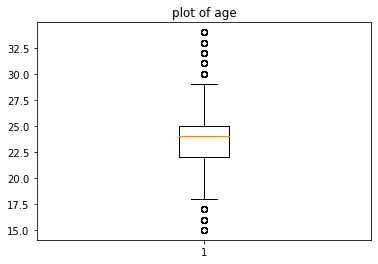

In [99]:
plt.boxplot(data['Age'])
plt.title('plot of age')
plt.show()

## Feature Engineering

In [100]:
y = data['Total Social Media Usage']

In [101]:
x=data.drop(['Total Social Media Usage','Age', 'City', 'Current Status', 'Gender', 'Highest Education',
       'Location (City Airport Code)', 'Phone OS', 'State', 'Zone','Total Facebook Usage', 'Total Instagram Usage','Total WhatsApp Usage'],axis=1)

In [102]:
x.columns

Index(['Total Week Usage', 'Total Weekend Usage'], dtype='object')

# 3. Exploratory Data Analysis

<AxesSubplot:xlabel='Count', ylabel='Highest Education'>

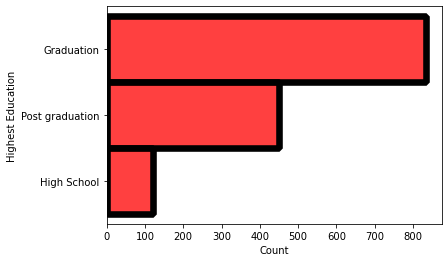

In [103]:
sns.histplot(y="Highest Education",data=data,color="red")

<AxesSubplot:xlabel='Gender', ylabel='Age'>

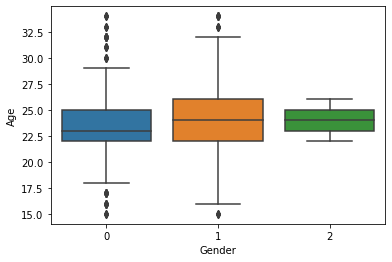

In [104]:
sns.boxplot(x='Gender',y='Age',data=data)

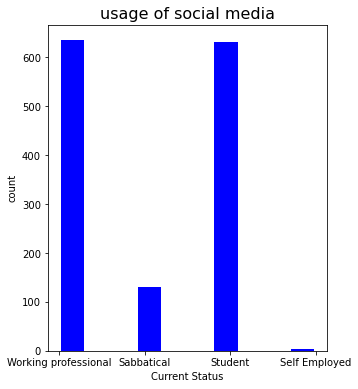

In [105]:
plt.figure(figsize=(5,6))
plt.hist(data['Current Status'],color='blue',rwidth=0.9)
plt.title('usage of social media',fontsize=16)
plt.xlabel('Current Status')
plt.ylabel('count')
plt.xticks()
plt.yticks()
plt.show()

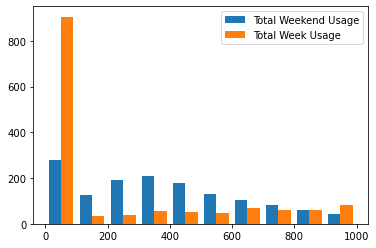

In [106]:
plt.hist([data['Total Weekend Usage'], data['Total Week Usage']],label=['Total Weekend Usage','Total Week Usage'])
plt.legend(loc='upper right')
plt.show()

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'Age'),
  Text(1.5, 0, 'Gender'),
  Text(2.5, 0, 'Total Social Media Usage'),
  Text(3.5, 0, 'Total Week Usage'),
  Text(4.5, 0, 'Total Weekend Usage')])

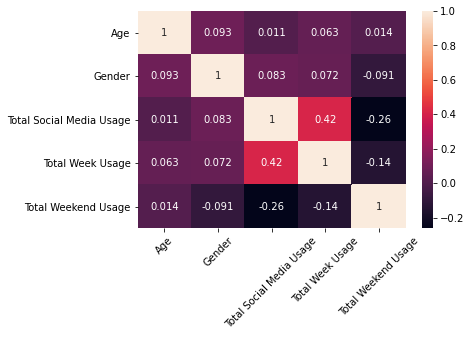

In [107]:
sns.heatmap(data.corr(),annot=True)
plt.xticks(rotation=45)

- from the graphs it is clear that individuals whose education level is graduation uses social media the most
- Student and Working professionals took the lead in using social media
- people are found more often in online during weekends other than weekdays


# 4.Modelling

Here the target variable which is total social media usage is predicted using regression models.

In [108]:
##splitting the dataset into features and target
y=data['Total Social Media Usage']

In [109]:
x=data.drop(['Total Social Media Usage','Age', 'City', 'Current Status', 'Gender', 'Highest Education',
       'Location (City Airport Code)', 'Phone OS', 'State', 'Zone','Total Facebook Usage', 'Total Instagram Usage','Total WhatsApp Usage'],axis=1)

In [110]:
##splitting the dataset into train and test set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [111]:
##checking the no of datapoints in the training and testing set
x_train.shape

(1051, 2)

In [112]:
x_test.shape

(351, 2)

## Linear Regression

In [113]:
from math import sqrt
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
#making prediction using the model
predictions=model.predict(x_test)

In [114]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('RMSE is',sqrt(mean_squared_error(y_test,predictions)))

RMSE is 244.55944778445757


In [115]:
rsquare= r2_score(y_test,predictions)
print('R2 value:',r2_score(y_test,predictions))

R2 value: 0.12549698480354665


## SVM Regressor

In [116]:
from sklearn.svm import SVR
svm_regressor=SVR(kernel="rbf")
svm_regressor.fit(x_train,y_train)
y_pred=svm_regressor.predict(x_test)
RMSE=sqrt(mean_squared_error(y_test,y_pred))
print('RMSE is',RMSE)

RMSE is 248.68086822294924


In [117]:
rsquare= (r2_score(y_test,y_pred))
print('R2 value:',rsquare)

R2 value: 0.09577362430421854


## Decision Tree

In [118]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
RMSE=sqrt(mean_squared_error(y_test,y_pred))
print('RMSE is',RMSE)

RMSE is 120.15798005517641


In [119]:
rsquare= r2_score(y_test,y_pred)
print('R2 value:',r2_score(y_test,y_pred))

R2 value: 0.7888954184111727


## Random Forest

In [120]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
RMSE=sqrt(mean_squared_error(y_test,y_pred))
print('RMSE is',RMSE)

RMSE is 107.75041330292692


In [121]:
rsquare= r2_score(y_test,y_pred)
print('R2 value:',r2_score(y_test,y_pred))

R2 value: 0.8302419763688094


## KNN

In [136]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor


knn_model=neighbors.KNeighborsRegressor(n_neighbors=10, metric='minkowski')
knn_model.fit(x_train,y_train)
prediction=knn_model.predict(x_test)
MSE=sqrt(mean_squared_error(y_test,pred))
print('MSE is:',MSE)

MSE is: 106.65973308127421


In [123]:
rsquare= r2_score(y_test,pred)
print('R2 value:',r2_score(y_test,pred))

R2 value: 0.8341848474385684


**KNN model has high R2 value and low RMSE value. So KNN is the most suitable model  for prediction**

# 5. Model Fine Tuning

In [137]:
knn_model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [143]:
model=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=None, n_neighbors=10, p=2, weights='uniform')  
model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [144]:
y_pred=model.predict(x_test)
MSE=sqrt(mean_squared_error(y_test,prediction))
print('MSE is:',MSE)
rsquare= r2_score(y_test,pred)
print('R2 value:',r2_score(y_test,prediction))

MSE is: 106.65973308127421
R2 value: 0.8336612605108933


In [153]:
#gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
gboost=GradientBoostingRegressor()
gboost.fit(x_train,y_train)

GradientBoostingRegressor()

In [155]:
y_pred=gboost.predict(x_test)
MSE=sqrt(mean_squared_error(y_test,prediction))
print('MSE is:',MSE)
rsquare= r2_score(y_test,prediction)
print('R2 value:',r2_score(y_test,prediction))

MSE is: 106.65973308127421
R2 value: 0.8336612605108933


In [164]:
test= pd.DataFrame({'Predicted Data': pred, 'Test Data' : y_test})
test

,Predicted Data,Test Data
1293,0.0,0.0
1140,0.0,0.0
67,0.0,0.0
1470,682.6,647.0
864,0.0,0.0
...,...,...
258,0.0,0.0
519,0.0,0.0
1593,0.0,0.0
471,0.0,0.0
